In [9]:
#https://soumenatta.medium.com/analyzing-pima-indians-diabetes-data-using-python-89a021b5f4eb

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas_profiling

from matplotlib import rcParams
import warnings

warnings.filterwarnings("ignore")

# tamaño de la figura en pulgadas
rcParams["figure.figsize"] = 10, 6
np.random.seed(42)

# Cargar conjunto de datos
data = pd.read_csv("datasets/diabetes.csv")

# mostrar muestra del conjunto de datos
data.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
668,6,98,58,33,190,34.0,0.430,43,0
324,2,112,75,32,0,35.7,0.148,21,0
624,2,108,64,0,0,30.8,0.158,21,0
690,8,107,80,0,0,24.6,0.856,34,0
473,7,136,90,0,0,29.9,0.210,50,0


In [10]:
# Get the column names 
col_idx = data.columns
print(col_idx)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [11]:
# Determine the shape of the DataFrame
data.shape

(768, 9)

In [12]:
# Find data type for each attribute 
print(data.dtypes) 

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [13]:
# Generate statistical summary 
description = data.describe()
print(description)

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [14]:
class_counts = data.groupby('Outcome').size() 
print("Class breakdown of the data:\n")
print(class_counts)

Class breakdown of the data:

Outcome
0    500
1    268
dtype: int64


In [16]:
# Compute correlation matrix 
correlations = data.corr(method = 'pearson') 
print(correlations)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

In [17]:
skew = data.skew() 
print("Skew of attribute distributions in the data:\n") 
print(skew) 

Skew of attribute distributions in the data:

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64


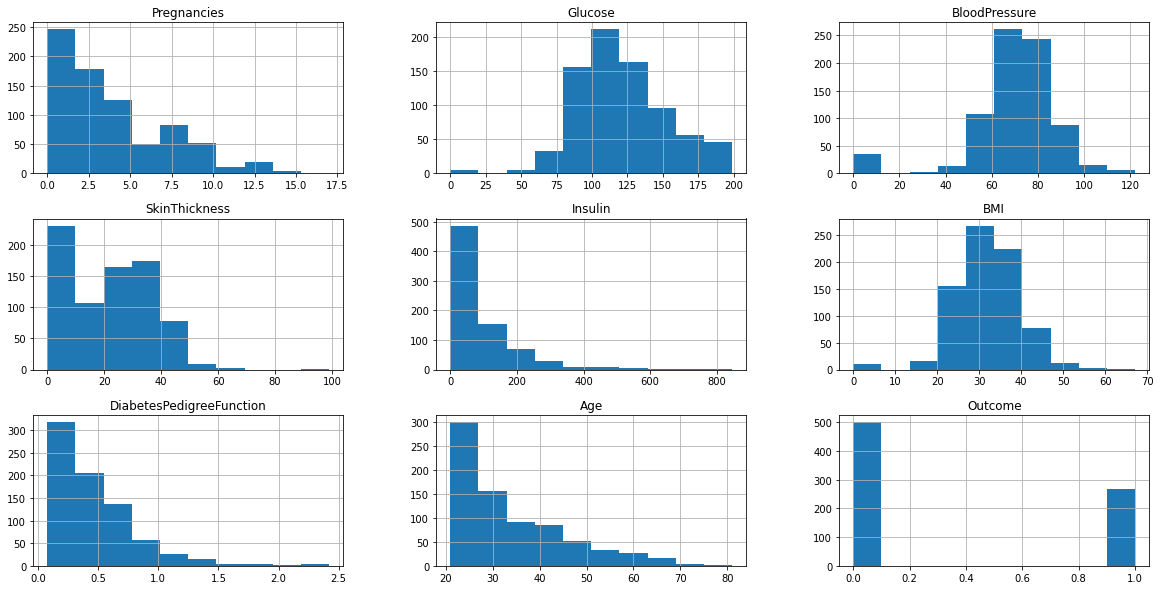

In [18]:
# Import required package 
from matplotlib import pyplot
# set the figure size
pyplot.rcParams['figure.figsize'] = [20, 10];
# Draw histograms for all attributes 
data.hist()
pyplot.show()

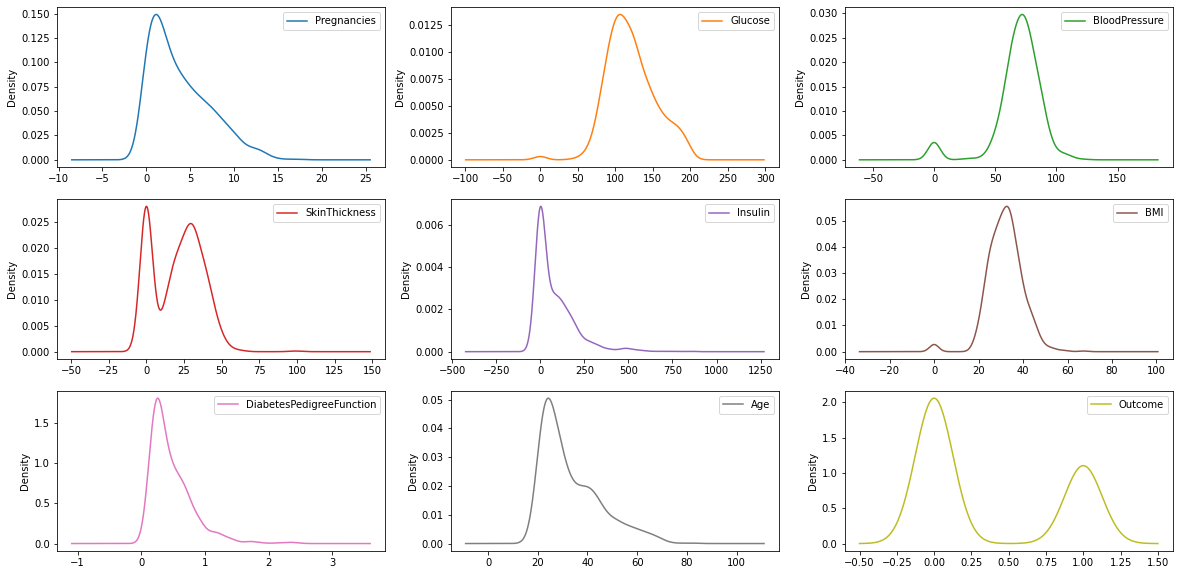

In [19]:
# Density plots for all attributes
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
pyplot.show()

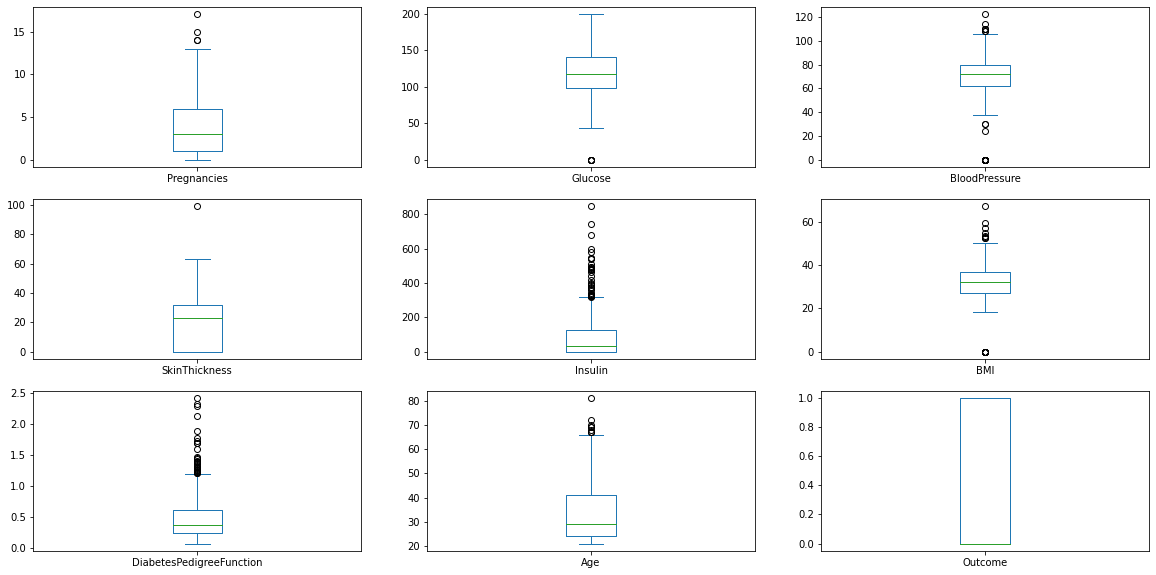

In [20]:
# Draw box and whisker plots for all attributes 
data.plot(kind= 'box', subplots=True, layout=(3,3), sharex=False, sharey=False)
pyplot.show()

In [21]:
# Compute the correlation matrix 
correlations = data.corr(method = 'pearson') 
# Correlations between all pairs of attributes

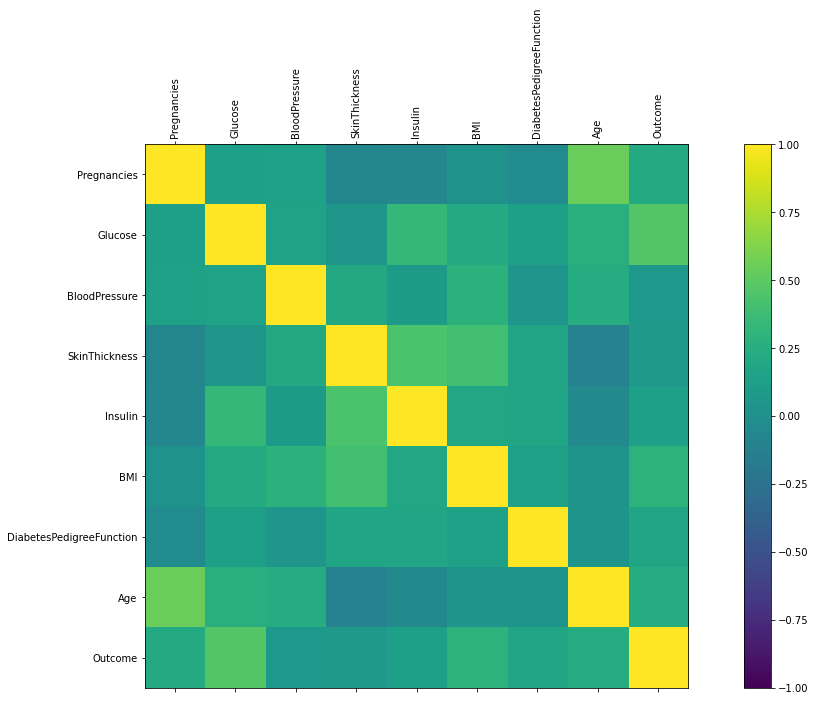

In [22]:
# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
names = data.columns
# Rotate x-tick labels by 90 degrees
ax.set_xticklabels(names,rotation=90) 
ax.set_yticklabels(names)
pyplot.show()

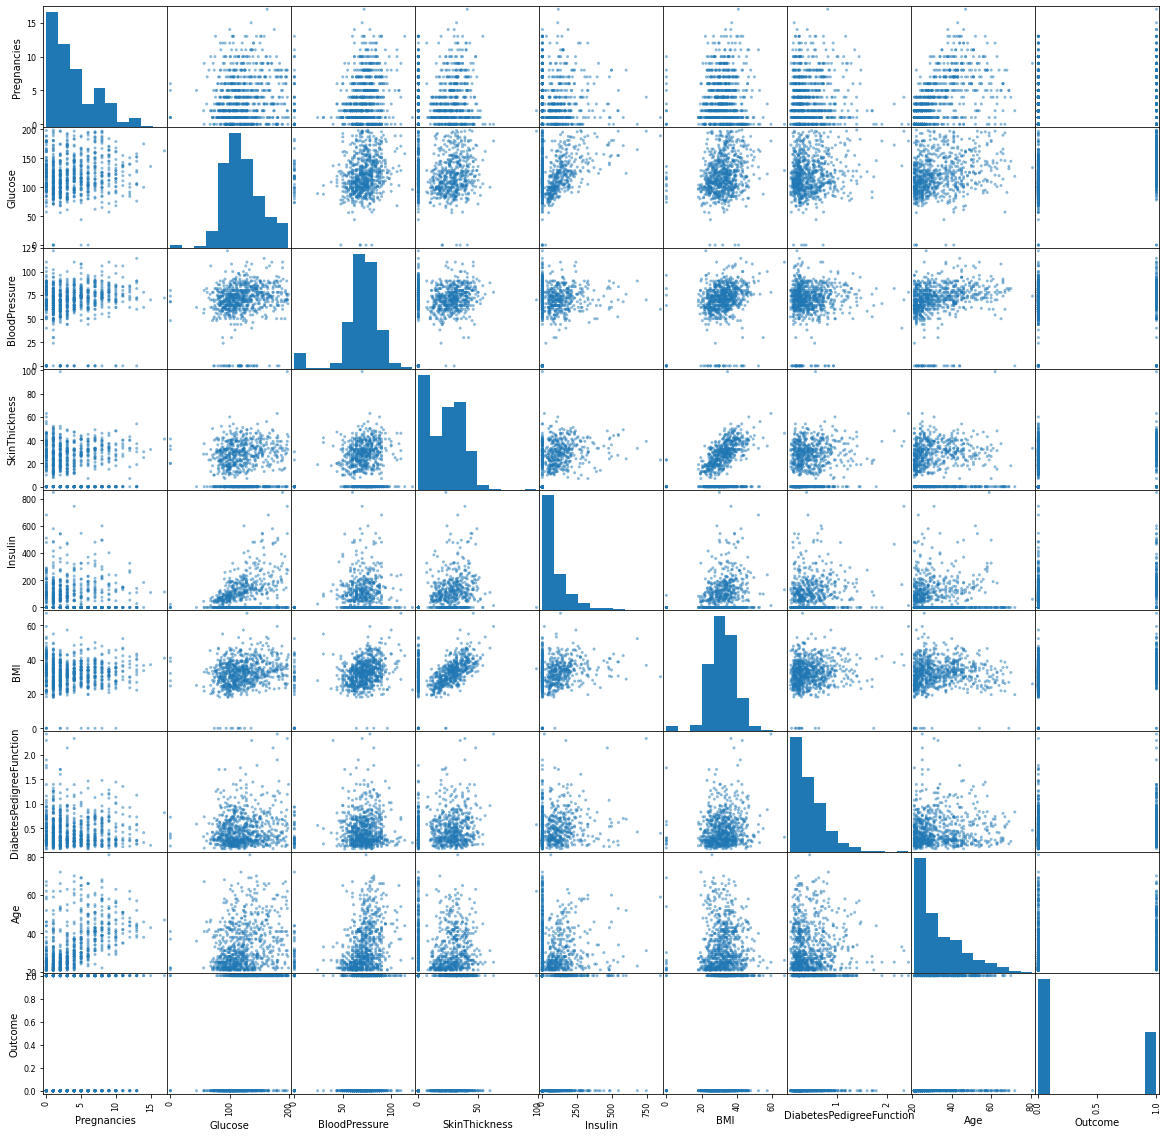

In [24]:
# Import required package 
from pandas.plotting import scatter_matrix
pyplot.rcParams['figure.figsize'] = [20, 20]
# Plotting Scatterplot Matrix
scatter_matrix(data)
pyplot.show()